# Financial Econometrics - Jonas Santana e Matheus Oliveira

## Dados Merval e YPF

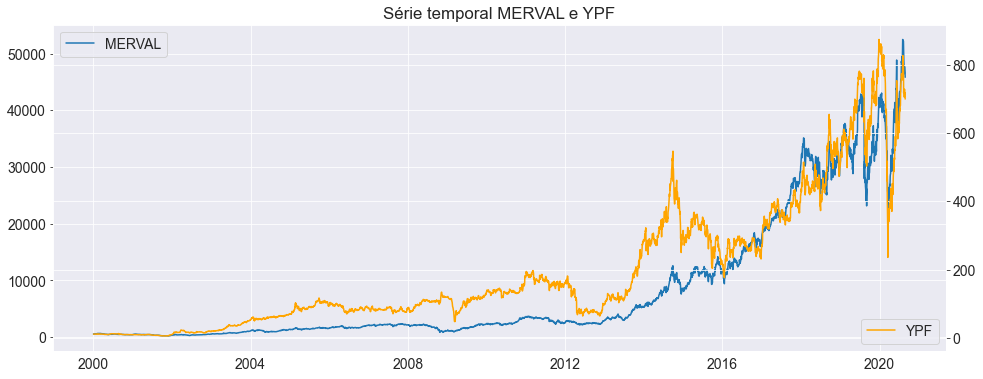

In [1]:
#importa bibliotecas utilizadas

import seaborn
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

#seta parametros dos graficos

seaborn.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

#inicializa dados MERVAL e substitui os NA's por aproximação linear

df = pd.read_excel(r'C:\Users\jonas\Desktop\Financial Econometrics\Indices.xlsx',index_col=0)
df.index = pd.to_datetime(df.index)
df = df[['MERVAL']].interpolate()

#carrega dados YPF e substitui os NA's por aproximação linear

ypf = pd.read_excel(r'C:\Users\jonas\Desktop\Financial Econometrics\YPF.xlsx')
ypf = ypf.drop([0,1], axis = 0)
ypf.columns = ypf.iloc[0]
ypf = ypf.drop([2])
ypf.index = pd.to_datetime(ypf['Data'])
ypf = ypf['Fechamento']
for i in range(len(ypf)):
    if ypf[i] == '-':
        ypf[i] = None
ypf = pd.to_numeric(ypf)
ypf = ypf.interpolate()

#junta os dois dataframes e plota ambas as séries

df = df.join(ypf)

df.columns = ['MERVAL','YPF']

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(df['MERVAL'])
ax_right.plot(df['YPF'], color = 'orange')
plt.title('Série temporal MERVAL e YPF')
ax_left.legend(['MERVAL'])
ax_right.legend(['YPF'], loc='lower right')
plt.show()

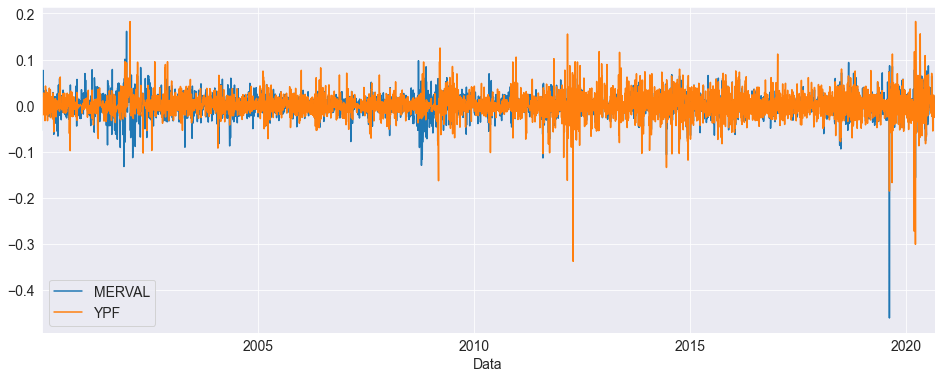

In [2]:
#tira a diferença dos logs e plota a nova série

df_new = np.log(df)
df_new = df_new.diff()[1:]
df_new.plot(grid=True)
plt.show()

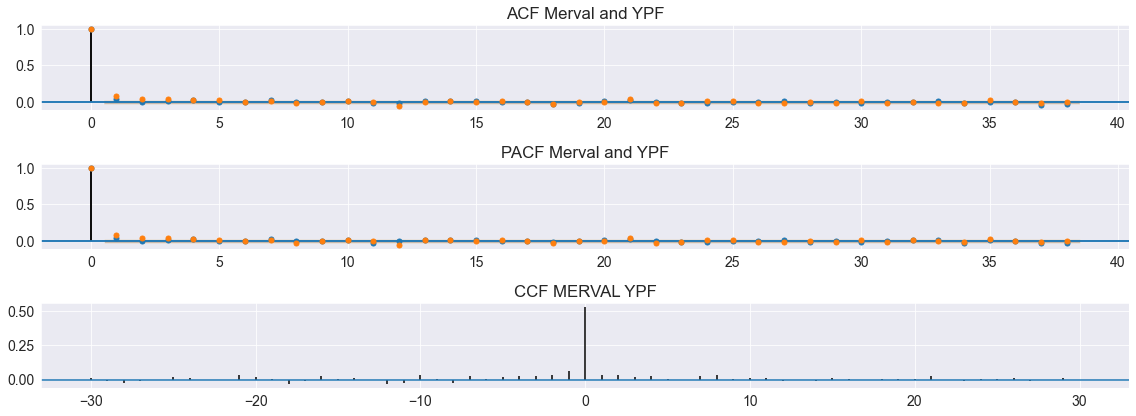

In [25]:
#plota ambas ACF e PACF

fig, ax = plt.subplots(3, 1)

sm.graphics.tsa.plot_acf(df_new['MERVAL'], ax=ax[0])
sm.graphics.tsa.plot_acf(df_new['YPF'],ax=ax[0])
ax[0].set_title('ACF Merval and YPF')

sm.graphics.tsa.plot_pacf(df_new['MERVAL'],ax=ax[1])
sm.graphics.tsa.plot_pacf(df_new['YPF'],ax=ax[1])
ax[1].set_title('PACF Merval and YPF')

#Plot a ccf
plt.sca(ax[2])
plt.xcorr(df_new['MERVAL'],df_new['YPF'], maxlags=30)
ax[2].set_title("CCF MERVAL YPF")

plt.tight_layout()
plt.show()



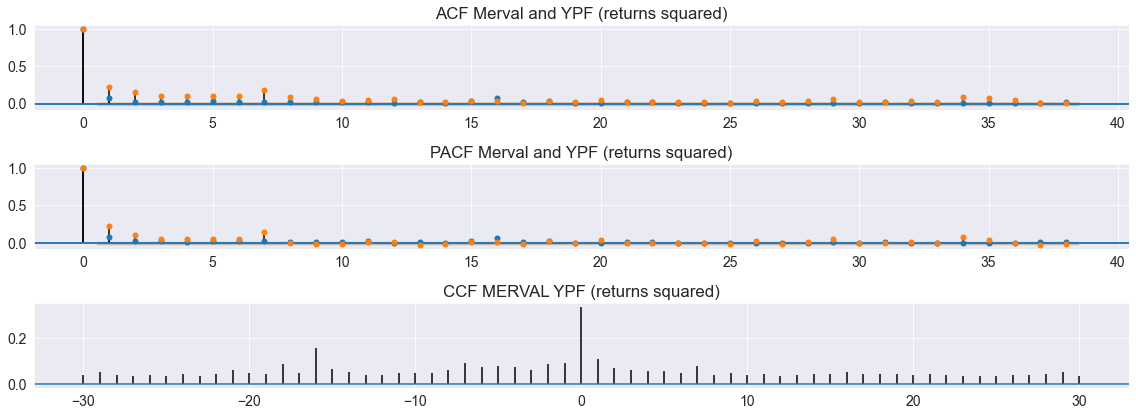

In [23]:
#plota ambas ACF e PACF dos quadrados dos retornos

fig, ax = plt.subplots(3, 1)

sm.graphics.tsa.plot_acf(np.square(df_new['MERVAL']), ax=ax[0])
sm.graphics.tsa.plot_acf(np.square(df_new['YPF']),ax=ax[0])
ax[0].set_title('ACF Merval and YPF (returns squared)')

sm.graphics.tsa.plot_pacf(np.square(df_new['MERVAL']),ax=ax[1])
sm.graphics.tsa.plot_pacf(np.square(df_new['YPF']),ax=ax[1])
ax[1].set_title('PACF Merval and YPF (returns squared)')

#Plot a ccf
plt.sca(ax[2])
plt.xcorr(np.square(df_new['MERVAL']),np.square(df_new['YPF']), maxlags=30)
ax[2].set_title("CCF MERVAL YPF (returns squared)")

plt.tight_layout()
plt.show()